##  BUSINESS PROBLEM 

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.



##  AIM AND GOALS

The aim of this analysis is to identify the key characteristics of successful films both financially and critically  and to provide data driven recommendations that will guide the company's new movie studio in creating profitable and appealing content. This includes examining factors such as genre performance, budget efficiency, audience and critic sentiment, and seasonal trends to uncover what truly drives box office success. 
- To identify the characteristics of successful films  and provide data-driven recommendations for creating profitable and appealing content.
- Identify Profitable Film Types by finding which genres, budgets, or production patterns lead to high profits.
- Understand Genre Performance by determining which genres consistently perform well in revenue and reviews.
- Evaluating the Impact of Budget on Success by understanding if high-budget films always perform better.
- Analyze Audience Sentiment and Engagement by knowing what audiences love based on ratings, reviews, and popularity.
- Critic vs Audience Preference achieved by checking if critically acclaimed movies align with audience favorites.
- Find Seasonal or Time-Based Trends and if release timing affects success.
- Assess Studio Competitors and understanding what established studios are doing right.
- Make Actionable Recommendations and Provide specific guidance on what films to make.



### 1. IMPORTING LIBRARIES,LOADING THE DATAS AND UNDERSTANDING THE DATA.

In [583]:
#Importing the libraries
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [584]:
movies_finance = pd.read_csv("Data/bom.movie_gross.csv")
movies_finance.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


- The dataset above represents movies financial performance information

In [585]:
movies_details = pd.read_csv("Data/rt.movie_info.tsv", sep="\t")
movies_details.head(n=3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


- The above dataset is more about descriptive and release information like who made the movie, what it's about, how long it is and when it came out.

In [586]:
critics_review = pd.read_csv("Data/rt.reviews.tsv", sep="\t",encoding='iso-8859-1')
critics_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


- This dataset is about how critics reviewed the movies,What they wrote ,How they rated it (scores),Whether they liked it or not (fresh/rotten)and where the review came from and date.

In [587]:
audience_rating = pd.read_csv("Data/tmdb.movies.csv")
audience_rating.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


- This dataset is about how audiences rate and interact with movies

In [588]:
budgets = pd.read_csv("Data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


- This dataset is all about cost vs profit

In [589]:
#Viewing the available data in the database
# Connect to the database
conn = sqlite3.connect('Data/im.db')

# Find all table names
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The above results shows all the tables inside im.db.

### 2. CLEANING THE DATA

##### 1) movies_finance

In [590]:
movies_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [591]:
#Filling the missing values with "Unknown"
movies_finance["studio"] = movies_finance["studio"].fillna("Unknown")

In [592]:
#Filling the missing value with 0 as a placeholder
movies_finance["domestic_gross"]= movies_finance["domestic_gross"].fillna(0)

In [593]:
#Filling the missing value with 0 as a placeholder
movies_finance["foreign_gross"] = movies_finance["foreign_gross"].fillna(0).astype(str)

In [594]:
# Remove commas and converting to float
movies_finance["foreign_gross"] = movies_finance["foreign_gross"].str.replace(',', '').astype('float64')

In [595]:
#Veryfying the changes have been implemented
movies_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


##### 2) movies_details

In [596]:
movies_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [597]:
movies_details.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [598]:
#Filling synopsis,rating,genre,director writer and studio with "Unknown"
columns_to_fill = ['synopsis', 'rating', 'genre', 'director', 'writer', 'studio']

for column in columns_to_fill:
    movies_details[column] = movies_details[column].fillna("Unknown")

In [599]:
# Dropping the Currency and box_office column 
movies_details = movies_details.drop(columns=["currency","box_office"])

In [600]:
# Fill missing values in 'runtime' with the mode (the most frequent value)
movies_details['runtime'] = movies_details['runtime'].fillna(movies_details['runtime'].mode()[0])

In [601]:
#Filling the missing values with a placeholder date 
placeholder_date = 'Jan 1, 1900' 
movies_details['theater_date'] = movies_details['theater_date'].fillna(placeholder_date)
movies_details['dvd_date'] = movies_details['dvd_date'].fillna(placeholder_date)

In [602]:
movies_details['rating'].value_counts()

rating
R          521
NR         503
PG         240
PG-13      235
G           57
Unknown      3
NC17         1
Name: count, dtype: int64

In [603]:
# Converting `theater_date` and `dvd_date` to datetime
movies_details['theater_date'] = pd.to_datetime(movies_details['theater_date'], errors='coerce')
movies_details['dvd_date'] = pd.to_datetime(movies_details['dvd_date'], errors='coerce')

In [604]:
# Converting `runtime` to numeric after removing characters like, " minutes")
movies_details['runtime'] = movies_details['runtime'].replace({' minutes': '', ',': ''}, regex=True)
movies_details['runtime'] = pd.to_numeric(movies_details['runtime'], errors='coerce')

In [605]:
movies_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1560 non-null   object        
 2   rating        1560 non-null   object        
 3   genre         1560 non-null   object        
 4   director      1560 non-null   object        
 5   writer        1560 non-null   object        
 6   theater_date  1560 non-null   datetime64[ns]
 7   dvd_date      1560 non-null   datetime64[ns]
 8   runtime       1560 non-null   int64         
 9   studio        1560 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 122.0+ KB


##### 3) critics_review

In [606]:
critics_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [607]:
critics_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [608]:
#filling the review column with "not given" since we do not know the review
critics_review["review"] = critics_review["review"].fillna("Not given")

In [609]:
critics_review["rating"]

0          3/5
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
54427      NaN
54428      1/5
54429      2/5
54430    2.5/5
54431      3/5
Name: rating, Length: 54432, dtype: object

In [610]:
#Filling critic column with unknon
critics_review["critic"] = critics_review["critic"].fillna("Unknown")
critics_review["publisher"] = critics_review["publisher"].fillna("Unknown")

In [611]:
critics_review["rating"].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

##### 4) audience_rating

In [612]:
audience_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [613]:
audience_rating["original_language"].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [614]:
#Changing the release_date to datetime
audience_rating["release_date"] = pd.to_datetime(audience_rating["release_date"])

In [615]:
#Changing the original_language column to category 
audience_rating["original_language"] = audience_rating["original_language"].astype('category')

In [616]:
audience_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  category      
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.8+ MB


##### 5)budgets

In [617]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [618]:
# Remove $ and commas
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '', regex=False)
budgets['production_budget'] = budgets['production_budget'].str.replace(',', '', regex=False)

# converting to integer
budgets['production_budget'] = budgets['production_budget'].astype(int)

In [619]:
# Changing the release_date to datetime format
budgets["release_date"] = pd.to_datetime(budgets["release_date"])

In [620]:
# Remove $ and commas
budgets["domestic_gross"] = budgets["domestic_gross"].str.replace('$', '', regex=False)
budgets["domestic_gross"] = budgets["domestic_gross"].str.replace(',', '', regex=False)

# converting to integer
budgets["domestic_gross"] = budgets["domestic_gross"].astype(int)

In [621]:
# Remove $ and commas
budgets["worldwide_gross"] = budgets["worldwide_gross"].str.replace('$', '', regex=False)
budgets["worldwide_gross"] = budgets["worldwide_gross"].str.replace(',', '', regex=False)

# converting to integer
budgets["worldwide_gross"] = budgets["worldwide_gross"].astype(int)

In [622]:
#Confirming the cahnges 
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


##### 6) other tables

In [623]:
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [624]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics"
,conn)

In [625]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [626]:
 directors = pd.read_sql("SELECT * FROM directors"
,conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [627]:
known_for = pd.read_sql(" SELECT * FROM known_for",conn)
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [628]:
movie_akas = pd.read_sql(" SELECT * FROM movie_akas",conn)
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [629]:
movie_ratings = pd.read_sql(" SELECT * FROM movie_ratings",conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [630]:
persons = pd.read_sql(" SELECT * FROM persons",conn)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [631]:
principals = pd.read_sql(" SELECT * FROM principals",conn)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [632]:
writers = pd.read_sql(" SELECT * FROM writers",conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


### MERGING

In [633]:
movie_person_roles = pd.merge(writers, directors, on=['movie_id', 'person_id'], how='inner')
movie_person_roles

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0996958,nm2286991
3,tt0996958,nm2286991
4,tt0999913,nm0527109
...,...,...
942468,tt8999892,nm10122247
942469,tt8999892,nm10122247
942470,tt8999974,nm10122357
942471,tt9001390,nm6711477


In [634]:
movie_complete_details = pd.merge(movie_ratings, movie_basics, on='movie_id', how='left')
movie_complete_details

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


### ANALYSIS 

Understand Genre Performance
Identify Profitable Film 
Evaluate the Impact of Budget on Success
Analyze Audience Sentiment and Engagement
Find Seasonal or Time-Based Trends

### 1)Understand Genre Performance

In [680]:
# Grouping by genre (from genre_ids) and calculating average vote and vote count
data = audience_rating.groupby('genre_ids').agg(
    average_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).reset_index()
data

,genre_ids,average_vote,total_votes
0,"[10402, 10749, 18]",7.950000,46
1,"[10402, 10749, 35, 18]",6.500000,240
2,"[10402, 10749, 35]",6.500000,11
3,"[10402, 10749]",5.466667,109
4,"[10402, 10751, 14, 10770, 35]",5.400000,36
...,...,...,...
2472,"[99, 9648]",5.700000,412
2473,"[99, 99, 99]",10.000000,1
2474,"[99, 99]",8.250000,3
2475,[99],6.798351,40647


In [661]:
# Grouping by genre and calculating profit margin
budgets['profit_margin'] = (budgets['worldwide_gross'] - budgets['production_budget']) / budgets['production_budget']

budgets.groupby('release_date').agg(
    average_profit_margin=('profit_margin', 'mean')
).reset_index()


,release_date,average_profit_margin
0,1915-02-08,99.000000
1,1916-09-05,-1.000000
2,1916-12-24,39.000000
3,1920-09-17,29.000000
4,1925-11-19,88.795918
...,...,...
2413,2019-11-08,-1.000000
2414,2019-11-22,-1.000000
2415,2019-12-31,-1.000000
2416,2020-02-21,-1.000000


In [664]:
# Calculate profit for each film
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

# Optionally, you can filter or sort by profit to identify the most profitable films
profitable_films = budgets.sort_values(by='profit', ascending=False)

# Display the most profitable films
profitable_films[ 'profit'].head() 


0     2351345279
42    2008208395
6     1748134200
5     1747311220
33    1433854864
Name: profit, dtype: int64

In [671]:
# Group by calculate average profit by movie
budgets.groupby('release_date').agg(
    average_profit=('profit', 'mean'),
    total_profit=('profit', 'sum'),
     movie_names=('movie', lambda x: ', '.join(x))
).reset_index().sort_values(by='average_profit', ascending=False)

,release_date,average_profit,total_profit,movie_names
2339,2018-04-27,1.748134e+09,1748134200,Avengers: Infinity War
2109,2015-04-03,1.328723e+09,1328722794,Furious 7
2348,2018-06-22,1.135773e+09,1135772799,Jurassic World: Fallen Kingdom
2117,2015-05-01,1.072414e+09,1072413963,Avengers: Age of Ultron
1226,2003-12-17,1.047403e+09,1047403341,The Lord of the Rings: The Return of the King
...,...,...,...,...
2409,2019-08-30,-7.500000e+07,-75000000,PLAYMOBIL
2385,2019-01-22,-7.597833e+07,-75978328,Renegades
2416,2020-02-21,-8.200000e+07,-82000000,Call of the Wild
2314,2017-12-13,-9.000000e+07,-90000000,Bright


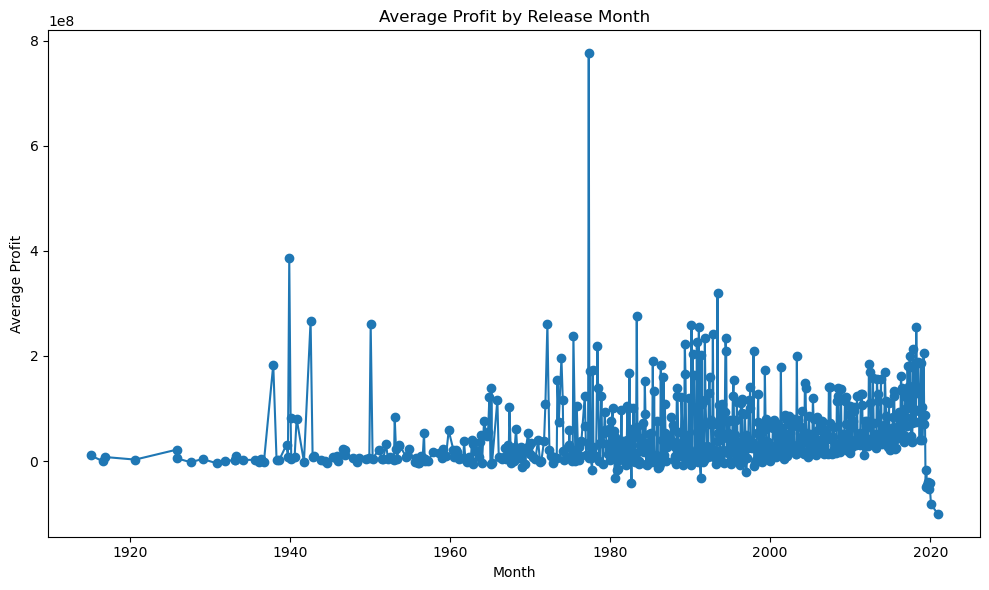

In [691]:
# Convert 'release_date' to datetime if it's not already
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

# Create a 'month_year' column by extracting year and month
budgets['month_year'] = budgets['release_date'].dt.to_period('M')

# Group by 'month_year' and calculate the average profit
monthly_profit = budgets.groupby('month_year').agg(
    average_profit=('profit', 'mean')
).reset_index()

# Convert 'month_year' to a timestamp for plotting
monthly_profit['month_year'] = monthly_profit['month_year'].dt.to_timestamp()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit['month_year'], monthly_profit['average_profit'], marker='o')
plt.title('Average Profit by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.tight_layout()  
plt.show()


- Find Seasonal or Time-Based Trends

In [694]:
# Count number of films released in each date
budgets.groupby('release_date').agg(
    films_released=('movie', 'count')
).reset_index().sort_values(by='films_released', ascending=False)


,release_date,films_released
2082,2014-12-31,24
2185,2015-12-31,23
1766,2010-12-31,15
1606,2008-12-31,14
1688,2009-12-31,13
...,...,...
568,1992-09-25,1
569,1992-09-30,1
571,1992-10-23,1
572,1992-11-11,1


In [697]:
# Calculate profit for each film
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']
budgets['profit']

0       2351345279
1        635063875
2       -200237650
3       1072413963
4        999721747
           ...    
5777         -7000
5778        234495
5779         -3662
5780         -1400
5781        179941
Name: profit, Length: 5782, dtype: int64

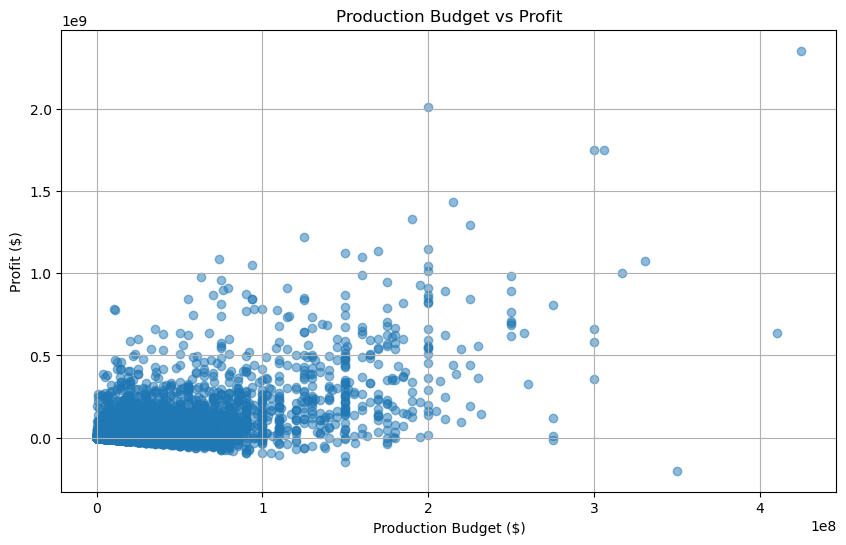

In [700]:
# Plotting production budget vs profit
plt.figure(figsize=(10, 6))
plt.scatter(budgets['production_budget'], budgets['profit'], alpha=0.5)
plt.title('Production Budget vs Profit')
plt.xlabel('Production Budget ($)')
plt.ylabel('Profit ($)')
#plt.xscale('log')  
#plt.yscale('log')  
plt.grid(True)
plt.show()

In [705]:
budgets['release_month'] = budgets['release_date'].dt.month
average_gross_by_year = budgets.groupby('release_year')[['domestic_gross', 'worldwide_gross']].mean()
print(average_gross_by_year)

              domestic_gross  worldwide_gross
release_year                                 
1               2.394962e+07     4.656382e+07
2               3.541465e+07     7.154453e+07
3               3.857299e+07     8.063337e+07
4               2.732840e+07     5.992026e+07
5               6.669795e+07     1.622680e+08
6               6.582791e+07     1.425230e+08
7               6.072804e+07     1.409636e+08
8               3.216821e+07     6.097841e+07
9               2.314989e+07     4.669369e+07
10              2.442350e+07     4.946456e+07
11              5.818117e+07     1.357416e+08
12              4.610082e+07     1.016932e+08


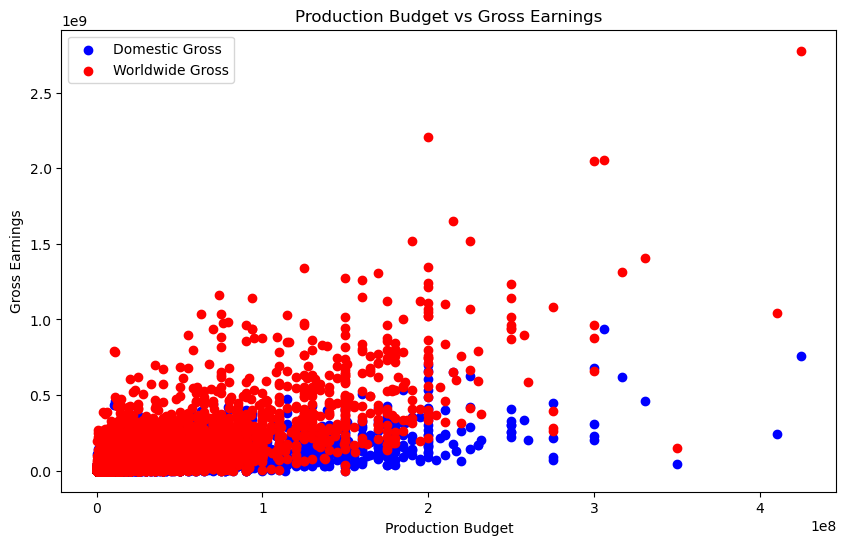

In [708]:
# 3. Production budget vs. gross earnings
plt.figure(figsize=(10, 6))
plt.scatter(budgets['production_budget'], budgets['domestic_gross'], label='Domestic Gross', color='blue')
plt.scatter(budgets['production_budget'],budgets['worldwide_gross'], label='Worldwide Gross', color='red')
plt.xlabel('Production Budget')
plt.ylabel('Gross Earnings')
plt.title('Production Budget vs Gross Earnings')
plt.legend()
plt.show()


In [709]:
audience_rating.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [713]:
# Sort the data by popularity and get the top 10 most popular movies
top_popular_movies = audience_rating.sort_values(by='popularity', ascending=False).head(10)
print(top_popular_movies[['title', 'popularity']])


                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


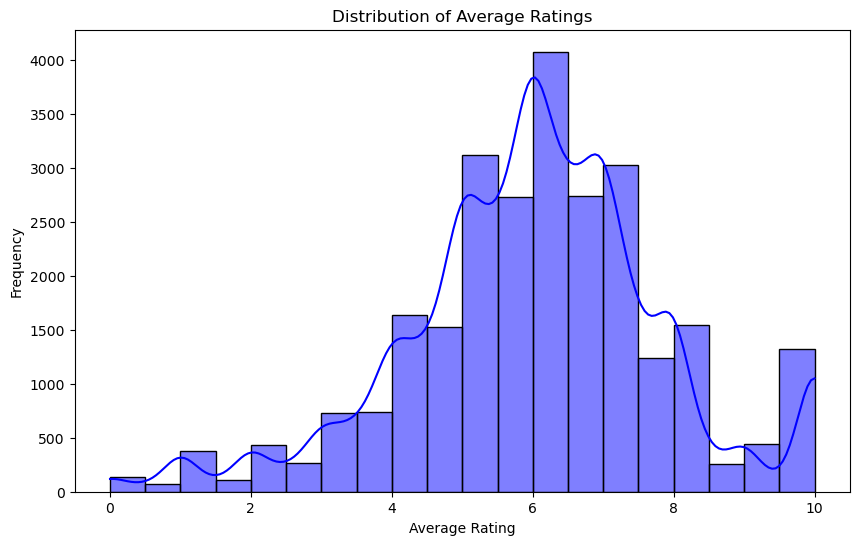

In [711]:
# Plot the distribution of average ratings vote_average
plt.figure(figsize=(10, 6))
sns.histplot(audience_rating['vote_average'], kde=True, bins=20, color='blue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


In [718]:
# The top 10 highest rated movies
top_rated_movies = audience_rating.sort_values(by='vote_average', ascending=False).head(10)
print(top_rated_movies[['title', 'vote_average']])


                                                   title  vote_average
13258                                  9/11: Simulations          10.0
22787         Lasagna Cat - Telephone Sex Survey Results          10.0
22592                                  MOTO 9: The Movie          10.0
22607                                 The Letter Carrier          10.0
22610  Hope This Goes Over Well/Living in an Empty World          10.0
22611                    The Children Send Their Regards          10.0
22614               Kinda Cool to Expend This Much Drool          10.0
22617  Margo Price - Live at Austin City Limits 10-03...          10.0
22618                      Morsefest 2015: Question Mark          10.0
22624                                        Kobalt Blue          10.0


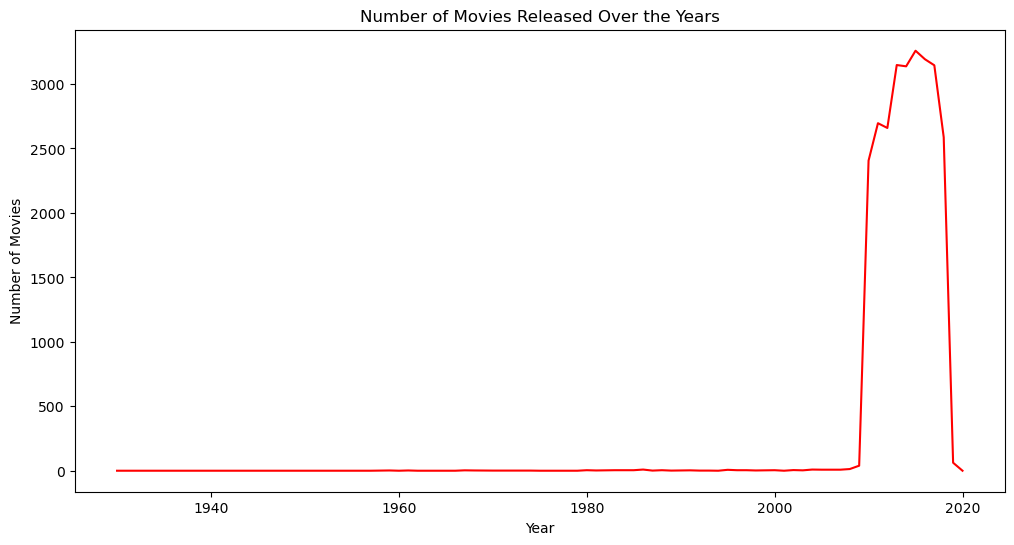

In [720]:
# Convert release_date to datetime format
audience_rating['release_date'] = pd.to_datetime(audience_rating['release_date'])

# Extract the year from the release date
audience_rating['release_year'] = audience_rating['release_date'].dt.year

# Count the number of movies released each year
movies_per_year = audience_rating['release_year'].value_counts().sort_index()

# Plot the number of movies released over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='red')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


- Analyze Audience Sentiment and Engagement

In [721]:
critics_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,Unknown,0,Cinema Scope,"October 12, 2017"


In [724]:
audience_rating.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_ids_str,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[12, 14, 10751]",2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]",2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]",2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]",1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]",2010


## Understand Genre Performance

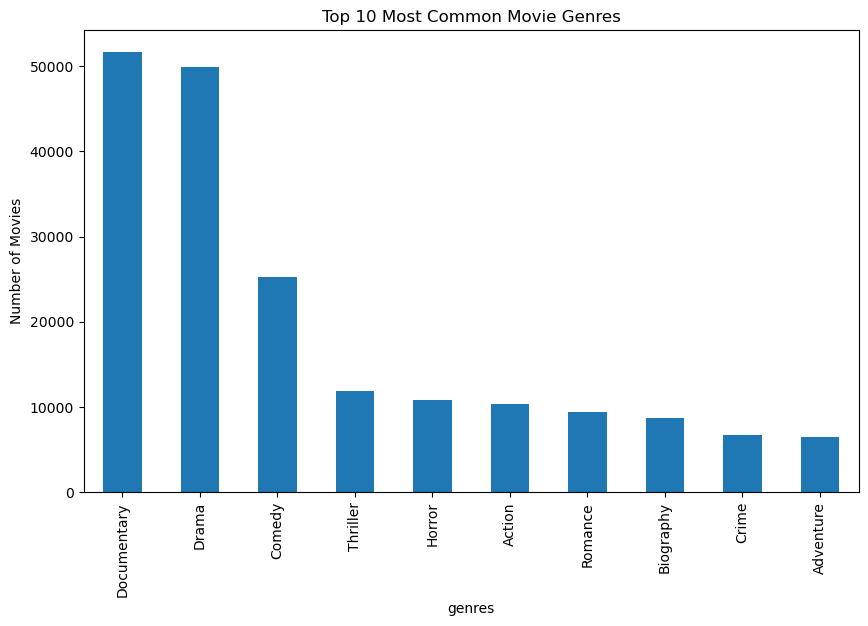

In [726]:

# First, split the genres and explode the list into individual rows
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics_exploded = movie_basics.explode('genres')
movie_basics_exploded['genres'] = movie_basics_exploded['genres'].str.strip()

# Merge movie_basics with movie_ratings (assuming common 'movie_id' field)
merged_data = pd.merge(movie_basics_exploded, movie_ratings, on='movie_id', how='left')

# Count the number of occurrences of each genre
genre_counts = merged_data['genres'].value_counts()

# Plot the top 10 most common genres
genre_counts.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Most Common Movie Genres')
plt.ylabel('Number of Movies')
plt.show()

## Average Rating by Genre

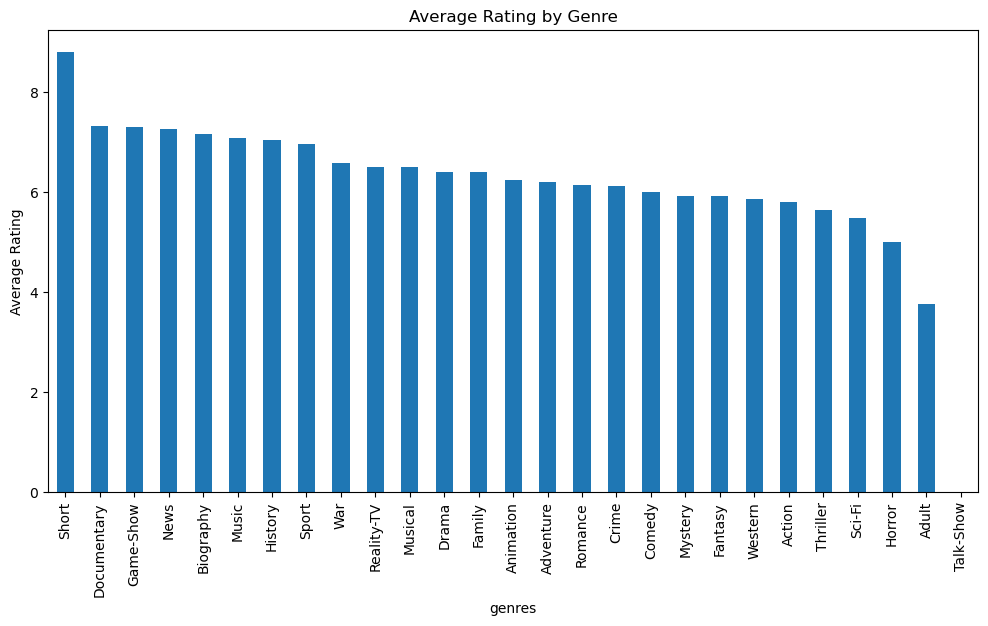

()

In [728]:
genre_sentiment = merged_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
genre_sentiment.plot(kind='bar', figsize=(12,6), title='Average Rating by Genre')
plt.ylabel('Average Rating')
plt.show()
()

- Analyze Audience Sentiment and Engagement